# Rates Exploration

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [28]:
# pip install openpyxl matplotlib plotly

## Data Ingestion (Reading in the data)

In [29]:
main_path = os.getcwd()

In [30]:
# main_path

In [31]:
input_data_path = os.path.join(main_path, "input_data")

In [32]:
# input_data_path

In [33]:
rate_file_name = "Rates.xlsx"

In [34]:
rate_file_data_path = os.path.join(input_data_path, rate_file_name)

In [35]:
# rate_file_data_path

In [36]:
rate_data = pd.read_excel(rate_file_data_path, header=1)

In [37]:
rate_data.head()

,Unnamed: 0,GBPEUR,GBPUSD,GBPCHF,GBPAUD,GBPJPY,GBPCAD,GBPSEK,GBPNZD,GBPNOK,GBPPLN
0,Date,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
1,2022-01-03 00:00:00,0.034417,0.058833,0.156028,0.003318,-0.13422,0.018315,-0.044198,-0.014144,-0.076295,0.090303
2,2022-01-04 00:00:00,0.039272,0.06276,0.156682,0.000321,-0.12484,0.019264,-0.042018,-0.013697,-0.074404,0.09174
3,2022-01-05 00:00:00,0.038838,0.064881,0.160228,0.004656,-0.12336,0.024895,-0.038531,-0.010074,-0.073168,0.093695
4,2022-01-06 00:00:00,0.038578,0.062917,0.163401,0.011025,-0.12704,0.020864,-0.036297,-0.004963,-0.070497,0.088827


In [38]:
rate_data.shape

(572, 11)

In [39]:
rate_data = rate_data.drop(rate_data.index[0])

In [40]:
rate_data.head()

,Unnamed: 0,GBPEUR,GBPUSD,GBPCHF,GBPAUD,GBPJPY,GBPCAD,GBPSEK,GBPNZD,GBPNOK,GBPPLN
1,2022-01-03 00:00:00,0.034417,0.058833,0.156028,0.003318,-0.13422,0.018315,-0.044198,-0.014144,-0.076295,0.090303
2,2022-01-04 00:00:00,0.039272,0.06276,0.156682,0.000321,-0.12484,0.019264,-0.042018,-0.013697,-0.074404,0.09174
3,2022-01-05 00:00:00,0.038838,0.064881,0.160228,0.004656,-0.12336,0.024895,-0.038531,-0.010074,-0.073168,0.093695
4,2022-01-06 00:00:00,0.038578,0.062917,0.163401,0.011025,-0.12704,0.020864,-0.036297,-0.004963,-0.070497,0.088827
5,2022-01-07 00:00:00,0.037191,0.067316,0.16508,0.012791,-0.12563,0.018256,-0.042392,-0.005012,-0.072952,0.084836


In [41]:
rate_data = rate_data.rename(columns={'Unnamed: 0': 'Date'})

In [42]:
rate_data.head()

,Date,GBPEUR,GBPUSD,GBPCHF,GBPAUD,GBPJPY,GBPCAD,GBPSEK,GBPNZD,GBPNOK,GBPPLN
1,2022-01-03 00:00:00,0.034417,0.058833,0.156028,0.003318,-0.13422,0.018315,-0.044198,-0.014144,-0.076295,0.090303
2,2022-01-04 00:00:00,0.039272,0.06276,0.156682,0.000321,-0.12484,0.019264,-0.042018,-0.013697,-0.074404,0.09174
3,2022-01-05 00:00:00,0.038838,0.064881,0.160228,0.004656,-0.12336,0.024895,-0.038531,-0.010074,-0.073168,0.093695
4,2022-01-06 00:00:00,0.038578,0.062917,0.163401,0.011025,-0.12704,0.020864,-0.036297,-0.004963,-0.070497,0.088827
5,2022-01-07 00:00:00,0.037191,0.067316,0.16508,0.012791,-0.12563,0.018256,-0.042392,-0.005012,-0.072952,0.084836


In [43]:
rate_data.shape

(571, 11)

In [44]:
rate_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 1 to 571
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    570 non-null    object
 1   GBPEUR  570 non-null    object
 2   GBPUSD  570 non-null    object
 3   GBPCHF  570 non-null    object
 4   GBPAUD  570 non-null    object
 5   GBPJPY  570 non-null    object
 6   GBPCAD  570 non-null    object
 7   GBPSEK  570 non-null    object
 8   GBPNZD  570 non-null    object
 9   GBPNOK  570 non-null    object
 10  GBPPLN  570 non-null    object
dtypes: object(11)
memory usage: 49.2+ KB


In [45]:
# Convert 'Date' column to datatime
rate_data['Date'] = pd.to_datetime(rate_data['Date'])

# Convert all other columns to numeric, handling errors
# Exclude the date column from this operation
for col in rate_data.columns.drop('Date'):
    # 'errors= 'coerce' converts invalid parsing to NaN
    rate_data[col] = pd.to_numeric(rate_data[col], errors='coerce') 

In [46]:
rate_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 1 to 571
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    570 non-null    datetime64[ns]
 1   GBPEUR  570 non-null    float64       
 2   GBPUSD  570 non-null    float64       
 3   GBPCHF  570 non-null    float64       
 4   GBPAUD  570 non-null    float64       
 5   GBPJPY  570 non-null    float64       
 6   GBPCAD  570 non-null    float64       
 7   GBPSEK  570 non-null    float64       
 8   GBPNZD  570 non-null    float64       
 9   GBPNOK  570 non-null    float64       
 10  GBPPLN  570 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 49.2 KB


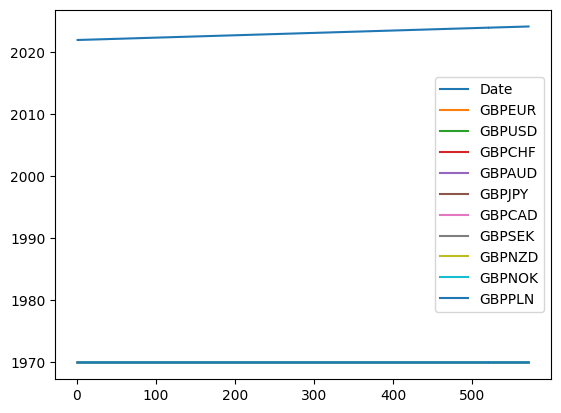

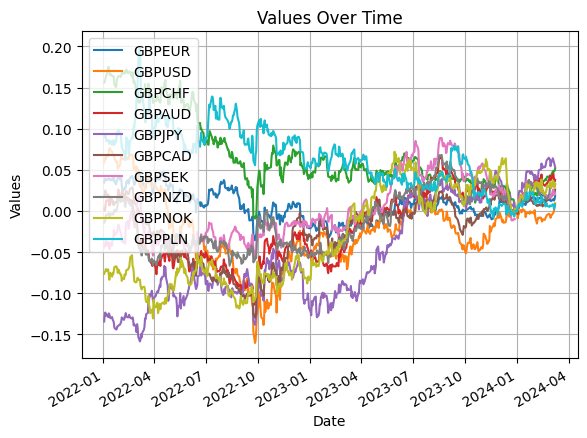

In [47]:
rate_data.plot()

# Set the 'Date' column as the index of your DataFrame if its not already
rate_data.set_index('Date', inplace=True)

#Plotting
rate_data.plot()

# Custmizing the plot
plt.title('Values Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [48]:
rate_data.head()

,GBPEUR,GBPUSD,GBPCHF,GBPAUD,GBPJPY,GBPCAD,GBPSEK,GBPNZD,GBPNOK,GBPPLN
Date,,,,,,,,,,
2022-01-03,0.034417,0.058833,0.156028,0.003318,-0.13422,0.018315,-0.044198,-0.014144,-0.076295,0.090303
2022-01-04,0.039272,0.062760,0.156682,0.000321,-0.12484,0.019264,-0.042018,-0.013697,-0.074404,0.091740
2022-01-05,0.038838,0.064881,0.160228,0.004656,-0.12336,0.024895,-0.038531,-0.010074,-0.073168,0.093695
2022-01-06,0.038578,0.062917,0.163401,0.011025,-0.12704,0.020864,-0.036297,-0.004963,-0.070497,0.088827
2022-01-07,0.037191,0.067316,0.165080,0.012791,-0.12563,0.018256,-0.042392,-0.005012,-0.072952,0.084836


# ChatGPT 2

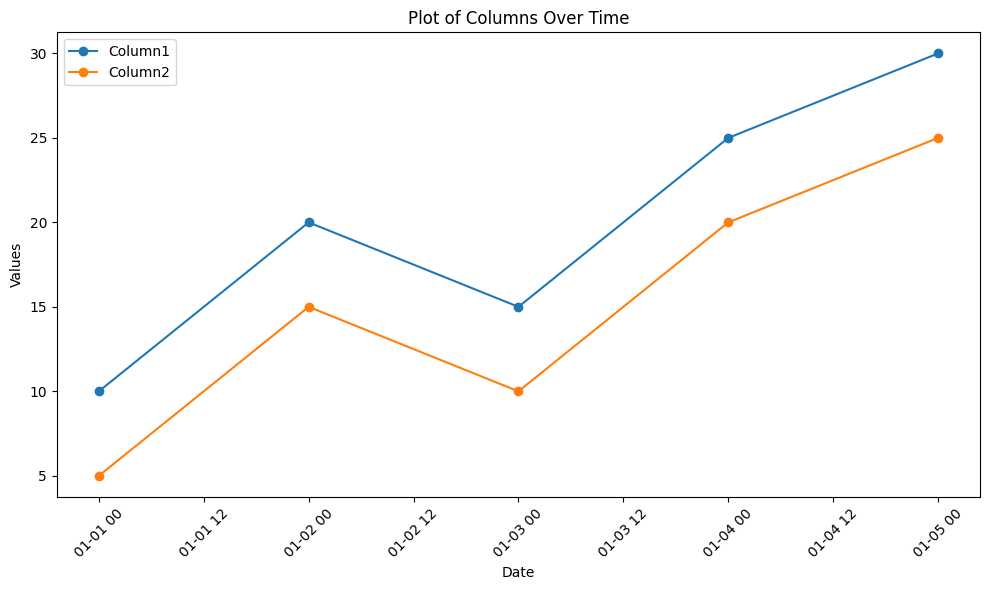

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with a date column and other columns
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
    'Column1': [10, 20, 15, 25, 30],
    'Column2': [5, 15, 10, 20, 25]
}
df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot 'Column1' against 'Date'
plt.plot(df['Date'], df['Column1'], label='Column1', marker='o')

# Plot 'Column2' against 'Date'
plt.plot(df['Date'], df['Column2'], label='Column2', marker='o')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot of Columns Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


## ChatGPT 3

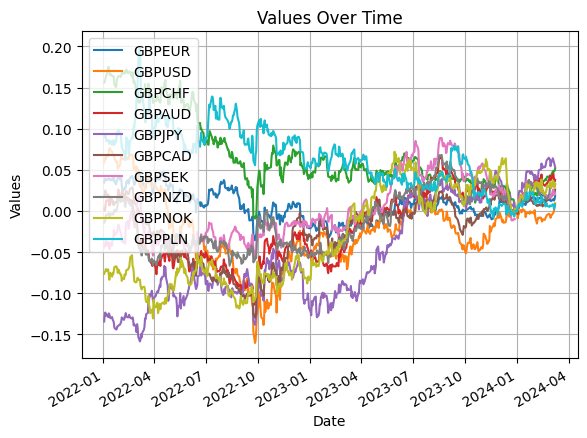

In [66]:
#Plotting
rate_data.plot()

# Customizing the plot
plt.title('Values Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## ChatGPT 3b

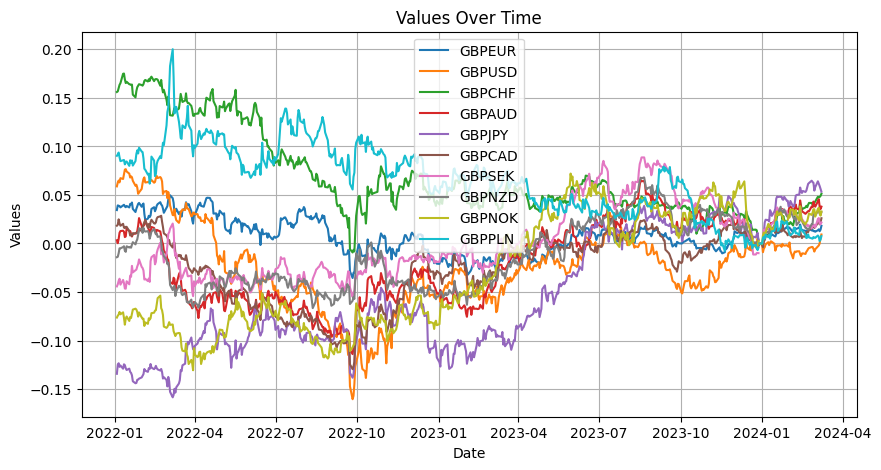

In [70]:
#Plotting
plt.figure(figsize=(10, 5)) # Set the figure size
for column in rate_data.columns:
    plt.plot(rate_data.index, rate_data[column], label=column)

# Customizing the plot
plt.title('Values Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [71]:
rate_data.columns

Index(['GBPEUR', 'GBPUSD', 'GBPCHF', 'GBPAUD', 'GBPJPY', 'GBPCAD', 'GBPSEK',
       'GBPNZD', 'GBPNOK', 'GBPPLN'],
      dtype='object')

In [72]:
#rate_data.columns[1:]

In [73]:
rate_data.head()

,GBPEUR,GBPUSD,GBPCHF,GBPAUD,GBPJPY,GBPCAD,GBPSEK,GBPNZD,GBPNOK,GBPPLN
Date,,,,,,,,,,
2022-01-03,0.034417,0.058833,0.156028,0.003318,-0.13422,0.018315,-0.044198,-0.014144,-0.076295,0.090303
2022-01-04,0.039272,0.062760,0.156682,0.000321,-0.12484,0.019264,-0.042018,-0.013697,-0.074404,0.091740
2022-01-05,0.038838,0.064881,0.160228,0.004656,-0.12336,0.024895,-0.038531,-0.010074,-0.073168,0.093695
2022-01-06,0.038578,0.062917,0.163401,0.011025,-0.12704,0.020864,-0.036297,-0.004963,-0.070497,0.088827
2022-01-07,0.037191,0.067316,0.165080,0.012791,-0.12563,0.018256,-0.042392,-0.005012,-0.072952,0.084836


In [74]:
rate_data_reset = rate_data.reset_index()

In [75]:
rate_data_reset.head()

,Date,GBPEUR,GBPUSD,GBPCHF,GBPAUD,GBPJPY,GBPCAD,GBPSEK,GBPNZD,GBPNOK,GBPPLN
0,2022-01-03,0.034417,0.058833,0.156028,0.003318,-0.13422,0.018315,-0.044198,-0.014144,-0.076295,0.090303
1,2022-01-04,0.039272,0.062760,0.156682,0.000321,-0.12484,0.019264,-0.042018,-0.013697,-0.074404,0.091740
2,2022-01-05,0.038838,0.064881,0.160228,0.004656,-0.12336,0.024895,-0.038531,-0.010074,-0.073168,0.093695
3,2022-01-06,0.038578,0.062917,0.163401,0.011025,-0.12704,0.020864,-0.036297,-0.004963,-0.070497,0.088827
4,2022-01-07,0.037191,0.067316,0.165080,0.012791,-0.12563,0.018256,-0.042392,-0.005012,-0.072952,0.084836


In [76]:
# Plotting
fig = px.line(
    rate_data_reset,
    x='Date',
    y=rate_data.columns[1:],
    title='Time Series Data',
    labels={'value': 'Value', 'variable': 'Series'})

# Show plot
fig.show()

## ChatGPT 4

In [77]:
import pandas as pd
import plotly.express as px

# Sample DataFrame
data = {
    'Date': pd.date_range(start='2021-01-01', periods=5, freq='D'),
    'Value1': [100, 200, 300, 400, 500],
    'Value2': [50, 150, 250, 350, 450]
}
df = pd.DataFrame(data)

# Plotting
fig = px.line(df, x='Date', y=df.columns[1:], title='Time Series Data',
              labels={'value': 'Value', 'variable': 'Series'})

# Show plot
fig.show()